<h1><center>A Guide to Creating an Accessible, Data-Driven Managment Aid for Small Farms</center></h1>

<h7><center>By Evan Kennedy   
University of Maryland, College Park: Applied Machine Learning Masters Program<center><h7>

### **Introduction** ###

Agriculture is often thought of in the public conscience as a relatively magical practice, built on tradition and unity with nature. Farmers in the modern day though, understand that a much more rigorous approach to agriculture is necessary to reach production levels necessary to provide for the modern population. Notable disciplines contributing to this approach have been the biological sciences through the innovation of our seeds and pest managements, chemistry through the innovation of our fertilizers and pesticides, and, especially notable for this project, computer and data science through the innovation of our management practices. This last, digitized revolution in agriculture, is often the most difficult to see. When seeds are purchased or fertilizers applied, it is fundamentally a physical product being used in a visible manner. Data insights, by comparison, are relatively enigmatic in nature, requiring not just complex computation, but explanation and advisement from specialized experts. The industry birthed by these innovations, precision agriculture, is a veritable god-send for large, industrial farms that easily recoup the costs of purchasing this advisement from the efficiency gains they enable. Smaller farms though, can often struggle to recoup the costs of purchasing this variety of consulting, or lack the ability to muster the capital for high-quality advising in the first place. Unfortunately, this gap becomes yet another factor contributing to the gradual movement in agriculture towards the cannibalisation of the small family farm with goals in the local interest by large, corporate growers with goals only in the interest of their evaluations, often at public cost.

Personally, I (the author of this work) come from an area (northern Harford County, Maryland) where small farms still hold onto life. Through the big things like our farm fairs, to the small, but incredibly important, things like being able to trust my tap water despite living in a rural area (a luxury those sharing water supplies with factory farms often struggle to enjoy), I have appreciated the value of these operations and those like them in my life, and the life of the everyday person. This work then, is a contribution from me to those operations I believe in, the small family farms of the world.

Below you will find a detailed tutorial running through a workflow that can be completed on a basic family computer, on data easily (and usually routinely) collected for most farms. The end product of this workflow is a model that can help to inform management decisions on a farm, and insights into the general impact trends of selected farm characteristics and practices on yields.

For those interested in data science, this guide can provide a clear example of how this discipline can provide tangible value for positive, real-world solutions. For those interested in agriculture, this guide can serve as an introduction into the practical implementation side of precision agriculture. And for those in agriculture, it can serve as an immediately useful tool for informing management decisions, both generally and specifically to one’s own operation.


### **Data Collection:** ###
For this analysis, sample data from a University of Nebraska study on experimental plots was used. While the work produced from the data in this tutorial can be reasonably generalized to other similar farms' fields, supplementing or replacing the data with historical data from the particular field of interest (ie. one's own field) will generally produce a more valuable end-product.

Data sourced from: https://datadryad.org/dataset/doi:10.5061/dryad.p30c6#citations  
Data was originally collected for: https://acsess.onlinelibrary.wiley.com/doi/10.2134/agronj2008.0103x

Data collection completed by the University of Nebraska-Lincoln Agricultural Research Division for the period 2002-2004, on experimentally controlled crop fields.

### **Data Processing:** ###  
Our first step will be to pull in our data from Excel sheets convenient for manual record-keeping into a Pandas DataFrame, to more easily perform automated manipulation and analysis than is easily possible in Excel.

### *Required Installations*

Note: a few installations are required to run this tutorial effectively
- Python: Download latest installation for your machine from: https://www.python.org/downloads/
- Jupyter Notebooks: https://jupyter.org/install
- A Development Environment: Visual Studio is a personal preferance: https://visualstudio.microsoft.com/downloads/

A few pip installations are required for various libraries included here. Running the below cell with the lines uncommented (by removing the # symbols) should resolve these.

In [270]:
#pip install xlrd
#pip install numpy
#pip install pandas
#pip install matplotlib
#pip install scikit-learn

### *Importing the Data*

In the particular study-sourced Excel sheet, there are 2 data tables, 1 with per treatment group data, 1 with per plot data. We'll look to combine these into one table that combines plot data with the corresponding treatment groups. Generally, we want to combine any input data in multiple tables into a single table for easier manipulation and analysis.

For these below steps to work, you project file and data files will need to be in the same folder, and you will need to verify that the file name for your data file matches the name that the below data_file variable has been set to (in "").

In [271]:
#Library imports necessary to run the bulk of the following commands
import numpy as np
import pandas as pd

In [272]:
#Importing data from Excel file in a dictionary of dataframes
data_file = "Nebr_HiYieldCornNPKS_Feb_2021.xls"
sheets = pd.read_excel(data_file, sheet_name=None)

#Pulling relevant data-containing tables out of dictionary into their own dataframes
site_info = sheets['Site-year information']
data_unpaired = sheets['Data']

In [273]:
#Checking on header for site_info
site_info.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,NaN,Year,Site-yr,Site,Latitude,Longitude,Soil,Texture,prev. Crop,Till,...,Hybrid,CRM,GDDsilk,GDDmat,Planting,VE,R1,R6,1000 pl./ac,Notes
1,NaN,2002,1,Mead,41.182,-96.459,Tomek,siCL,soybean,NT,...,33P67,113,1400,2760,2002-04-26 00:00:00,2002-05-10 00:00:00,2002-07-13 00:00:00,2002-09-12 00:00:00,26.7,NaN
2,NaN,2002,2,Wymore,40.124,-96.716,Wymore,siCL,soybean,NT,...,Mycogen 2833,115,1375,2655,2002-04-25 00:00:00,2002-05-09 00:00:00,NaN,2002-09-17 00:00:00,28.2,probably drought stress due to insufficient ir...
3,NaN,2002,3,Brunswick,42.291,-97.937,Thurman,lS,soybean,NT,...,Cargill 6920,112,NaN,2625,2002-04-30 00:00:00,2002-05-13 00:00:00,NaN,2002-09-09 00:00:00,30.4,low yields due to early-season N + S stress ca...
4,NaN,2002,4,Concord,42.39,-96.955,Nora,siL,soybean,NT,...,34M95,110,1360,2600,2002-05-06 00:00:00,2002-05-18 00:00:00,2002-07-21 00:00:00,2002-09-19 00:00:00,25.8,low population


Illustrating the importance of manually checking how your data has been imported, we now have a few problems we need to resolve:
 - The import of site information failed to read the header of the site information table, so we need to turn the top row of the site information table into its header (column names).
 - The 1st column of our site_info table is a column of NaN (meaning missing values) resultant of the formatting of the Excel sheet, so we need to drop that column.

In [274]:
#Setting header of site_info as its top row, then removing the first row
site_info.columns = site_info.iloc[0]
site_info_cleaned = site_info.drop(site_info.index[0], axis=0)

In [275]:
#Dropping columns that are fully NaN
site_info_cleaned = site_info_cleaned.dropna(axis=1, how='all')

In [276]:
#Checking on cleaned table for site info
site_info_cleaned.head()

,Year,Site-yr,Site,Latitude,Longitude,Soil,Texture,prev. Crop,Till,SOM (%),...,Hybrid,CRM,GDDsilk,GDDmat,Planting,VE,R1,R6,1000 pl./ac,Notes
1,2002,1,Mead,41.182,-96.459,Tomek,siCL,soybean,NT,3.125658,...,33P67,113,1400,2760,2002-04-26 00:00:00,2002-05-10 00:00:00,2002-07-13 00:00:00,2002-09-12 00:00:00,26.7,NaN
2,2002,2,Wymore,40.124,-96.716,Wymore,siCL,soybean,NT,2.709125,...,Mycogen 2833,115,1375,2655,2002-04-25 00:00:00,2002-05-09 00:00:00,NaN,2002-09-17 00:00:00,28.2,probably drought stress due to insufficient ir...
3,2002,3,Brunswick,42.291,-97.937,Thurman,lS,soybean,NT,0.659896,...,Cargill 6920,112,NaN,2625,2002-04-30 00:00:00,2002-05-13 00:00:00,NaN,2002-09-09 00:00:00,30.4,low yields due to early-season N + S stress ca...
4,2002,4,Concord,42.39,-96.955,Nora,siL,soybean,NT,3.341792,...,34M95,110,1360,2600,2002-05-06 00:00:00,2002-05-18 00:00:00,2002-07-21 00:00:00,2002-09-19 00:00:00,25.8,low population
5,2002,5,Bellwood,41.327,-97.336,Muir,lS,corn,RT,1.35506,...,33P67,113,1400,2760,2002-04-20 00:00:00,2002-05-08 00:00:00,2002-07-10 00:00:00,2002-09-04 00:00:00,30.5,N0P1K1: includes fertigation N


In [277]:
#Checking on import of primary data table
data_unpaired.head()

,Year,Site-yr,Site-no,Site,Soil,Texture,prevCrop,Till,Treatment,Treat-no,...,irrigN,Unnamed: 153,Unnamed: 154,Pes&f,cumNO3-F.1,HI.1,NHI.1,UN.1,GNc,GY
0,2002,1,1,Mead,Tomek,siCL,soybean,NT,N0P1K1,1,...,90,NaN,NaN,56.228796,56.768579,0.533417,0.699964,254.371367,1.429,14.302996
1,2002,1,1,Mead,Tomek,siCL,soybean,NT,N0P1K1,1,...,90,NaN,NaN,60.005346,58.162499,0.541430,0.730772,214.249529,1.398,12.856117
2,2002,1,1,Mead,Tomek,siCL,soybean,NT,N0P1K1,1,...,90,NaN,NaN,65.957155,49.048560,0.540095,0.732583,188.802036,1.275,12.452845
3,2002,1,1,Mead,Tomek,siCL,soybean,NT,N0P1K1,1,...,90,NaN,NaN,60.059336,50.363280,0.555228,0.734569,227.357476,1.404,13.654939
4,2002,1,1,Mead,Tomek,siCL,soybean,NT,N2P0K1,2,...,90,NaN,NaN,48.379216,NaN,0.541500,0.642286,296.713234,1.524,14.354754


In [278]:
#Dropping columns that are fully NaN
data_unpaired_cleaned = data_unpaired.dropna(axis=1, how='all')

In [279]:
#Checking on cleaned primary data table
data_unpaired_cleaned.head()

,Year,Site-yr,Site-no,Site,Soil,Texture,prevCrop,Till,Treatment,Treat-no,...,S 0-8,BD 0-8,irrigN,Pes&f,cumNO3-F.1,HI.1,NHI.1,UN.1,GNc,GY
0,2002,1,1,Mead,Tomek,siCL,soybean,NT,N0P1K1,1,...,5.123,1.32,90,56.228796,56.768579,0.533417,0.699964,254.371367,1.429,14.302996
1,2002,1,1,Mead,Tomek,siCL,soybean,NT,N0P1K1,1,...,4.086,1.32,90,60.005346,58.162499,0.541430,0.730772,214.249529,1.398,12.856117
2,2002,1,1,Mead,Tomek,siCL,soybean,NT,N0P1K1,1,...,5.083,1.32,90,65.957155,49.048560,0.540095,0.732583,188.802036,1.275,12.452845
3,2002,1,1,Mead,Tomek,siCL,soybean,NT,N0P1K1,1,...,4.087,1.32,90,60.059336,50.363280,0.555228,0.734569,227.357476,1.404,13.654939
4,2002,1,1,Mead,Tomek,siCL,soybean,NT,N2P0K1,2,...,5.262,1.32,90,48.379216,NaN,0.541500,0.642286,296.713234,1.524,14.354754


### *Feature Trimmng*

Now we want to remove features that we won't be using. In this particular case, either because they are (by collection procedure) not available for all treatment groups (making modeling their effects prohibitively difficult) or because they are redundant w/ another feature (share the same value w/ different units, value is repeated between site and treatment tables and thus doubled on combination, etc.).

In [280]:
#Defining set of features to select from primary data table
data_features_to_keep = ['Soil', 'prevCrop', 'Till', 'FN', 'FP', 'FK', 'FS', 'POP ac', \
    'HSW', 'BD 0-8', 'irrigN']
data_outputs_to_keep = ['GY bu', 'UN', 'UP', 'UK', 'US']
#data_outputs_to_keep = ['GY bu', 'GDM', 'CDM', 'VDM', 'TDM', 'HI', 'EARS', 'BARR', 'PROL', \
#    'KERNE', 'KERNm', 'UN', 'UP', 'UK', 'UCa', 'UMg', 'US']
data_fields_to_keep = data_features_to_keep + data_outputs_to_keep

In [281]:
#Selecting for only desired fields from primary data table
data_unpaired_selected = data_unpaired_cleaned[['Year', 'Site-yr', 'Site-no', 'Site'] + data_fields_to_keep]

In [282]:
data_unpaired_selected.head()

,Year,Site-yr,Site-no,Site,Soil,prevCrop,Till,FN,FP,FK,FS,POP ac,HSW,BD 0-8,irrigN,GY bu,UN,UP,UK,US
0,2002,1,1,Mead,Tomek,soybean,NT,0.0,20.0,40.0,0.0,27515.042219,37.6568,1.32,90,227.841783,254.371367,47.679775,250.395972,23.428858
1,2002,1,1,Mead,Tomek,soybean,NT,0.0,20.0,40.0,0.0,24894.562008,33.5677,1.32,90,204.793507,214.249529,39.894358,204.539736,20.609558
2,2002,1,1,Mead,Tomek,soybean,NT,0.0,20.0,40.0,0.0,26204.802114,32.4965,1.32,90,198.369522,188.802036,37.528017,210.324833,20.615087
3,2002,1,1,Mead,Tomek,soybean,NT,0.0,20.0,40.0,0.0,25331.308710,33.6192,1.32,90,217.518464,227.357476,43.528662,236.410476,21.773762
4,2002,1,1,Mead,Tomek,soybean,NT,140.0,0.0,40.0,0.0,23147.575200,36.9461,1.32,90,228.666270,296.713234,47.309287,273.609219,26.295870


In [283]:
#Defining set of features to select from site data table
site_features_to_keep = ['Hybrid', 'Texture', 'GDDsilk', 'GDDmat', 'Irrigation mm', 'SOM (%)', \
    'pH', 'Br.P (ppm)', 'Ols.P (ppm)', 'K (ppm)', 'NO3-N (ppm)', 'Water N ppm']

In [284]:
#Selecting for only desired fields from primary data table
site_info_selected = site_info_cleaned[['Site-yr'] + site_features_to_keep]
#Renaming soil N P K measures to be more meaningful names without their unit included, to make referencing easier
site_info_selected = site_info_selected.rename(columns={'Br.P (ppm)': 'Soil Br.P', 'Ols.P (ppm)': 'Soil Ols.P', \
                                                'K (ppm)': 'Soil K', 'NO3-N (ppm)': 'Soil NO3-N', \
                                                'Irrigation mm': 'Irrigation'})

### *Creating Full Data Table*

Now that all individual processing has been completed, we can combine the 2 tables into a single unified table.

In [285]:
#Joining site and data tables by their shared identifier 'Site-yr' [inner-join]
data_paired = pd.merge(site_info_selected, data_unpaired_selected, on='Site-yr', how='inner')

In [286]:
#Checking on combined dataframe
data_paired.head()

,Site-yr,Hybrid,Texture,GDDsilk,GDDmat,Irrigation,SOM (%),pH,Soil Br.P,Soil Ols.P,...,FS,POP ac,HSW,BD 0-8,irrigN,GY bu,UN,UP,UK,US
0,1,33P67,siCL,1400,2760,255.524,3.125658,6.119605,12.612618,8.687944,...,0.0,27515.042219,37.6568,1.32,90,227.841783,254.371367,47.679775,250.395972,23.428858
1,1,33P67,siCL,1400,2760,255.524,3.125658,6.119605,12.612618,8.687944,...,0.0,24894.562008,33.5677,1.32,90,204.793507,214.249529,39.894358,204.539736,20.609558
2,1,33P67,siCL,1400,2760,255.524,3.125658,6.119605,12.612618,8.687944,...,0.0,26204.802114,32.4965,1.32,90,198.369522,188.802036,37.528017,210.324833,20.615087
3,1,33P67,siCL,1400,2760,255.524,3.125658,6.119605,12.612618,8.687944,...,0.0,25331.308710,33.6192,1.32,90,217.518464,227.357476,43.528662,236.410476,21.773762
4,1,33P67,siCL,1400,2760,255.524,3.125658,6.119605,12.612618,8.687944,...,0.0,23147.575200,36.9461,1.32,90,228.666270,296.713234,47.309287,273.609219,26.295870


#### *Handling Missing Values*

Now that our data is fully pulled together, we should to check for missing values in our data, as observations with missing values will cause a problem for later modeling and analysis.

In [287]:
#Checking missing value incidences in the data
data_paired.isnull().sum()

Site-yr          0
Hybrid          40
Texture          0
GDDsilk        124
GDDmat           0
Irrigation       0
SOM (%)          0
pH               0
Soil Br.P        0
Soil Ols.P       0
Soil K           0
Soil NO3-N       0
Water N ppm      0
Year             0
Site-no          0
Site             0
Soil             0
prevCrop         0
Till             0
FN               0
FP               0
FK               0
FS               0
POP ac           0
HSW              0
BD 0-8           0
irrigN           0
GY bu            0
UN               0
UP               0
UK               0
US               0
dtype: int64

Now, we can observe that all of our missing fields are in Hybrid and GDDsilk. 

For Hybrid, this is a categorical variable, so we have little ability to fill in any missing values with approximately correct guesses. Thankfully, Hybrid information is only missing for a small number of observations (40/~1400), so we can just drop those observations for which it is missing and retain the associated information.

For GDDsilk, there is a comparatively larger portion of observations for which it is missing (~10% of observations) so we cannot simply drop the observations with the value missing. However, we do have extra information to use to our advantage. We know GDDsilk is a temperature experience measure, and was collected on a per-site/year combination basis. We also know that the other sites (by the experiment's design) were in close proximity of the sites missing their GDDsilk information. So given this, we can assume that averaging the GDDsilk of all sites with GDDsilk recorded for the same year can provide a reasonable approximation for these missing values.

In [288]:
#Dropping observations with Hybrid missing
data_paired.dropna(subset=['Hybrid'], inplace=True)

#Filling in missing GDDsilk with the average for that year
data_paired['GDDsilk'] = data_paired['GDDsilk'].fillna(data_paired.groupby('Year')['GDDsilk'].transform('mean'))

C:\Users\tsuna\AppData\Local\Temp\ipykernel_2012\2935854899.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_paired['GDDsilk'] = data_paired['GDDsilk'].fillna(data_paired.groupby('Year')['GDDsilk'].transform('mean'))


Then we can check to see that there are now no missing values

In [289]:
#Checking missing value incidences in the data
data_paired.isnull().sum()

Site-yr        0
Hybrid         0
Texture        0
GDDsilk        0
GDDmat         0
Irrigation     0
SOM (%)        0
pH             0
Soil Br.P      0
Soil Ols.P     0
Soil K         0
Soil NO3-N     0
Water N ppm    0
Year           0
Site-no        0
Site           0
Soil           0
prevCrop       0
Till           0
FN             0
FP             0
FK             0
FS             0
POP ac         0
HSW            0
BD 0-8         0
irrigN         0
GY bu          0
UN             0
UP             0
UK             0
US             0
dtype: int64

### **Exploratory Analysis** ###  

Now we'll create some graphs to get a cursory look at the relationships between yield, nutrient absorption, and growing conditions from the dataset. This is a useful step for verifying assumptions we may hold about what may and may not be useful to us in later modeling and analysis steps.

The following are not the only graphs formable from the dataset, so if interested in visualizing a relationship not visualized below, the same steps can be followed to create the desired graph.

#### *Yield w/ Inputs of Nitrogen, Phosphorus, Potassium, and Sulfur (chemical fertilizers)*

In [290]:
#Library imports for the creation of below graphs
import matplotlib.pyplot as plt
import seaborn as sns

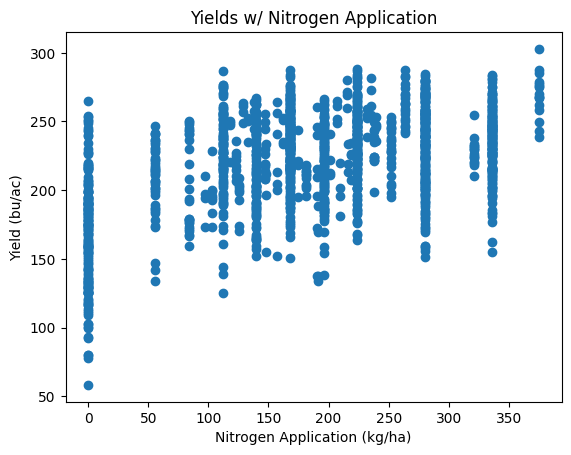

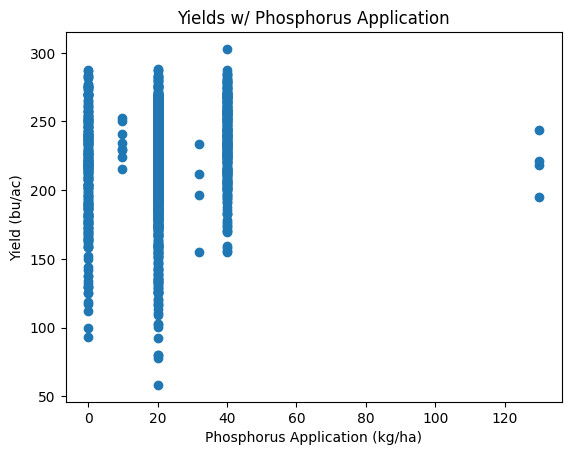

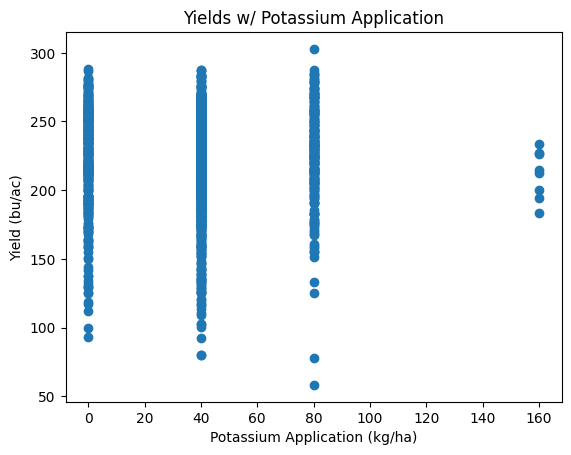

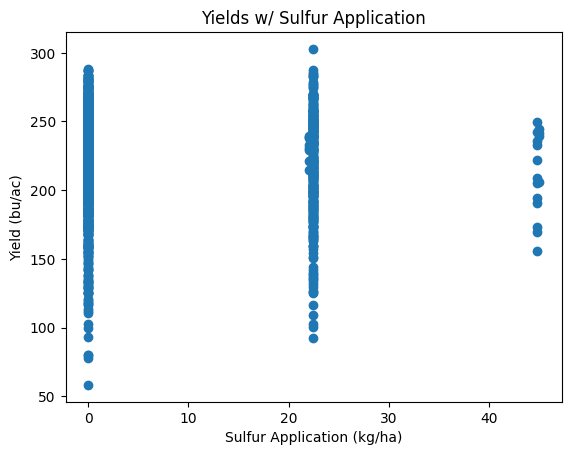

In [291]:
#Yield w/ Nitrogen Application
plt.scatter(data_paired['FN'], data_paired['GY bu'])
plt.xlabel("Nitrogen Application (kg/ha)")
plt.ylabel("Yield (bu/ac)")
plt.title("Yields w/ Nitrogen Application")
plt.show()

#Yield w/ Phosphorus Application
plt.scatter(data_paired['FP'], data_paired['GY bu'])
plt.xlabel("Phosphorus Application (kg/ha)")
plt.ylabel("Yield (bu/ac)")
plt.title("Yields w/ Phosphorus Application")
plt.show()

#Yield w/ Potassium Application
plt.scatter(data_paired['FK'], data_paired['GY bu'])
plt.xlabel("Potassium Application (kg/ha)")
plt.ylabel("Yield (bu/ac)")
plt.title("Yields w/ Potassium Application")
plt.show()

#Yield w/ Sulfur Application
plt.scatter(data_paired['FS'], data_paired['GY bu'])
plt.xlabel("Sulfur Application (kg/ha)")
plt.ylabel("Yield (bu/ac)")
plt.title("Yields w/ Sulfur Application")
plt.show()

These scatterplots are a bit difficult to read since our data only includes a few prescribed levels of inputs for phosphorus, potassium and sulfur. Luckily, we can get a better visualization using violinplots via the seaborn library. Violin plots are plots that can show the distribution of points for particular x-values, useful when the x-axis is dominated by only a few commonly shared values, making scatterplots difficult to read.

**Documentation for Seaborn Violinplots:** https://seaborn.pydata.org/generated/seaborn.violinplot.html

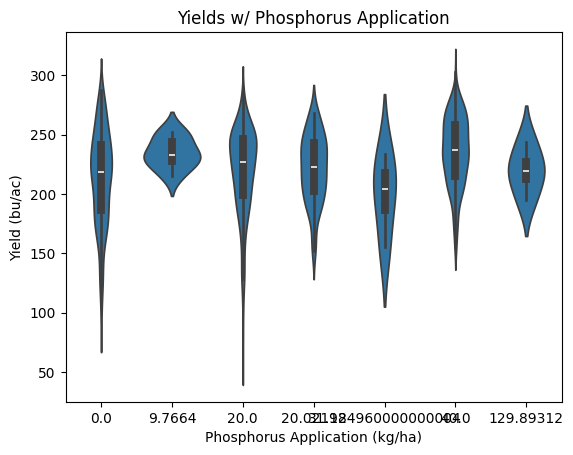

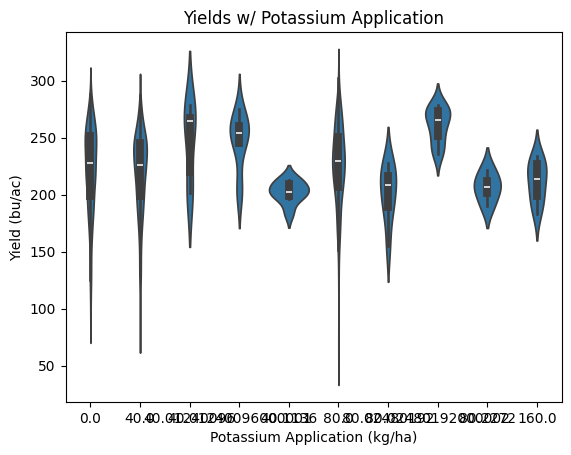

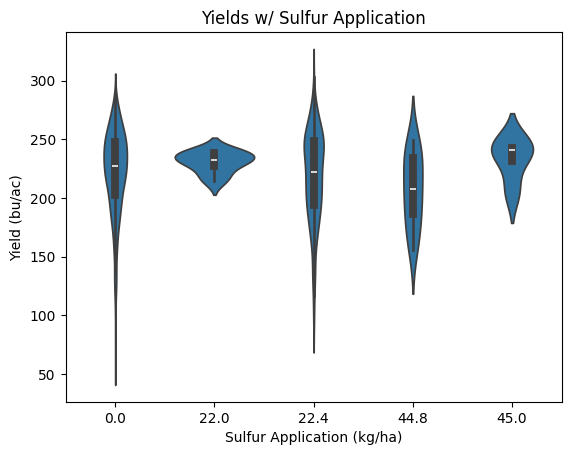

In [292]:
#Yields & Phosphorus Violinplot
sns.violinplot(x="FP", y="GY bu", data=data_paired)
plt.xlabel("Phosphorus Application (kg/ha)")
plt.ylabel("Yield (bu/ac)")
plt.title("Yields w/ Phosphorus Application")
plt.show()

#Yields & Potassium Violinplot
sns.violinplot(x="FK", y="GY bu", data=data_paired)
plt.xlabel("Potassium Application (kg/ha)")
plt.ylabel("Yield (bu/ac)")
plt.title("Yields w/ Potassium Application")
plt.show()

#Yields & Sulfur Violinplot
sns.violinplot(x="FS", y="GY bu", data=data_paired)
plt.xlabel("Sulfur Application (kg/ha)")
plt.ylabel("Yield (bu/ac)")
plt.title("Yields w/ Sulfur Application")
plt.show()

From these graphs, we can see a pretty obvious positive correlation between nitrogen application and yields, while other chemical inputs seem to have a more complicated relationship with yields, not displaying obvious yield growth with higher application rates as is apparent for nitrogen application.

#### *Yield w/ Irrigation*

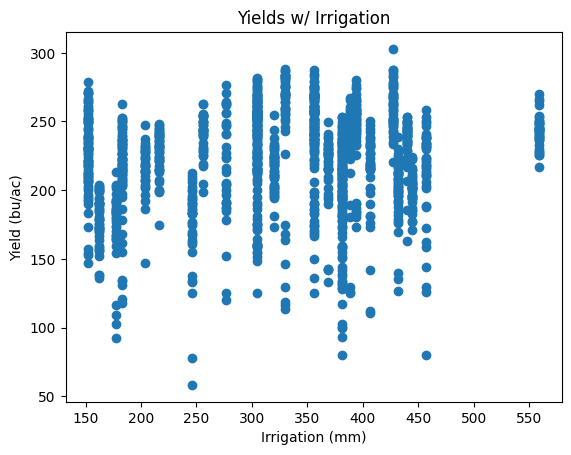

In [293]:
#Yield w/ Irrigation
plt.scatter(data_paired['Irrigation'], data_paired['GY bu'])
plt.xlabel("Irrigation (mm)")
plt.ylabel("Yield (bu/ac)")
plt.title("Yields w/ Irrigation")
plt.show()

A general positive correlation between irrigation and yields can be observed from the above scatterplot, but the correlation is notably not strong, likely because irrigation tends to be a driver of growth in productive plants, but does little to uplift struggling plants in the way nitrogen supplementation often can.

#### *Yield w/ Temperature (expressed as GDDs for silk and mature growth stages)*

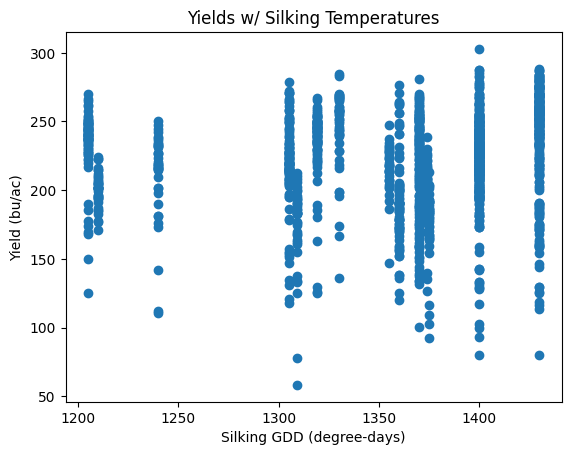

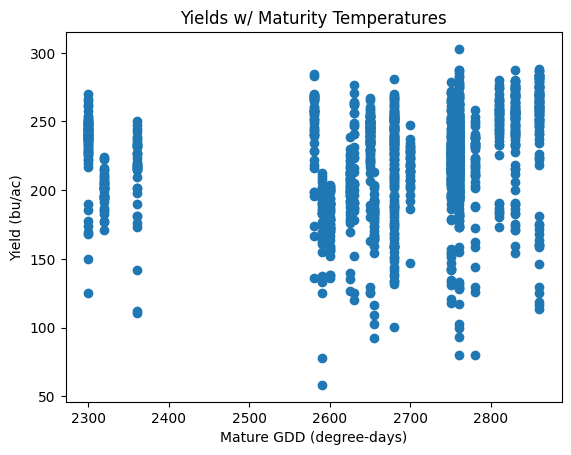

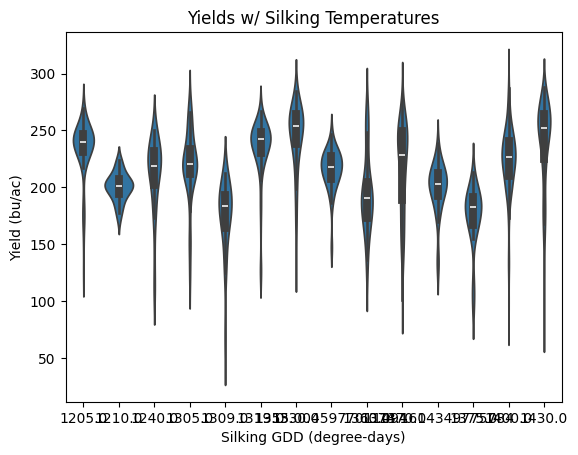

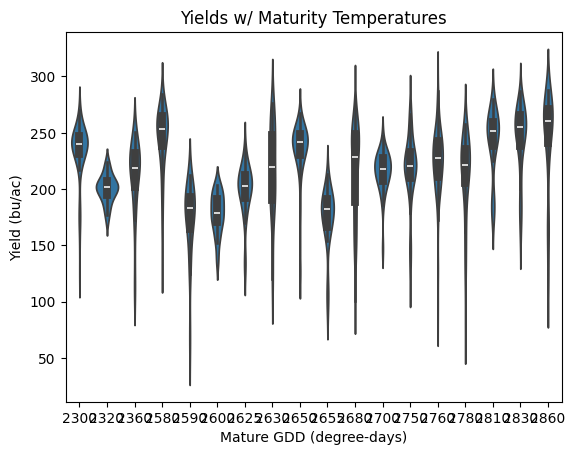

In [294]:
#Yield w/ GDD silk
plt.scatter(data_paired['GDDsilk'], data_paired['GY bu'])
plt.xlabel("Silking GDD (degree-days)")
plt.ylabel("Yield (bu/ac)")
plt.title("Yields w/ Silking Temperatures")
plt.show()

#Yield w/ GDD mature
plt.scatter(data_paired['GDDmat'], data_paired['GY bu'])
plt.xlabel("Mature GDD (degree-days)")
plt.ylabel("Yield (bu/ac)")
plt.title("Yields w/ Maturity Temperatures")
plt.show()

#Yield w/ GDD silk [Violinplot]
sns.violinplot(x="GDDsilk", y="GY bu", data=data_paired)
plt.xlabel("Silking GDD (degree-days)")
plt.ylabel("Yield (bu/ac)")
plt.title("Yields w/ Silking Temperatures")
plt.show()

#Yield w/ GDD mature [Violinplot]
sns.violinplot(x="GDDmat", y="GY bu", data=data_paired)
plt.xlabel("Mature GDD (degree-days)")
plt.ylabel("Yield (bu/ac)")
plt.title("Yields w/ Maturity Temperatures")
plt.show()

Yields predictably seem to perform better or similar for higher temperatures for both silking and maturity, demonstrating the general assumption of crop performance being related to temperature.

### *Chemical Absorption (into crop bodies) w/ Fertilizer Application*

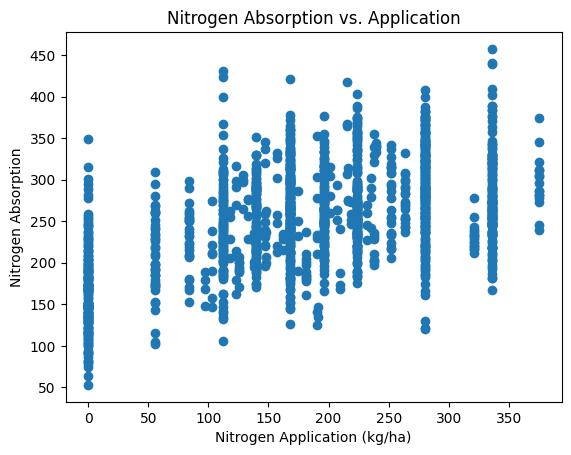

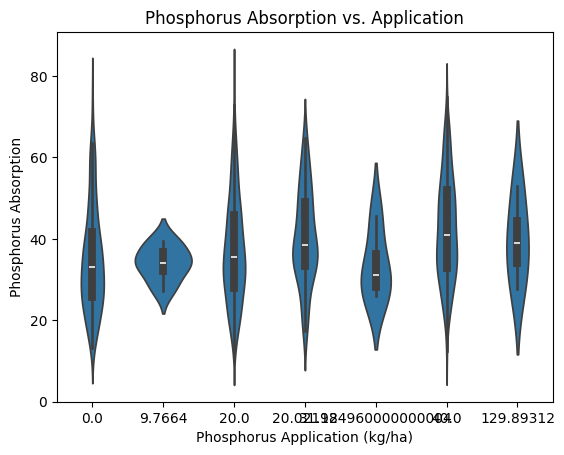

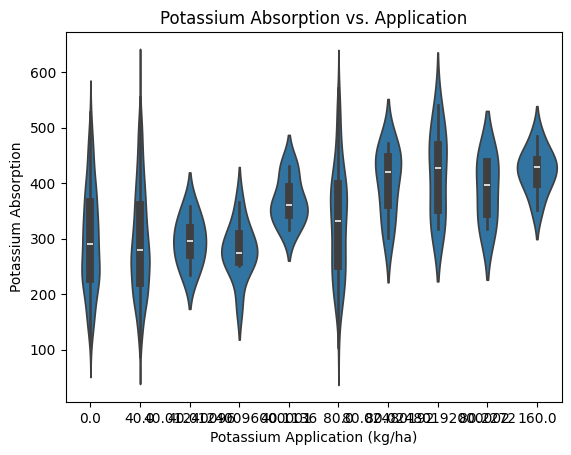

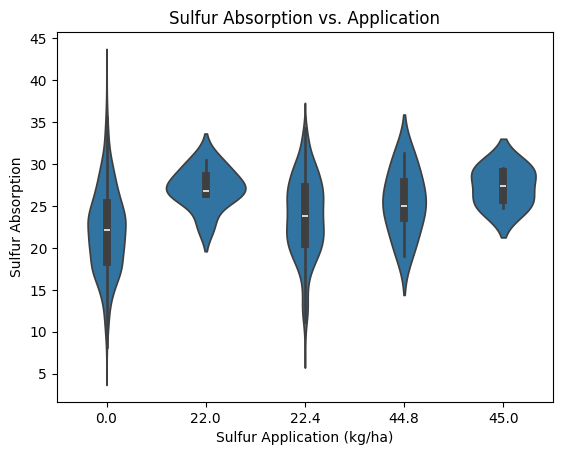

In [295]:
#Nitrogen Absorption w/ Nitrogen Application
plt.scatter(data_paired['FN'], data_paired['UN'])
plt.xlabel("Nitrogen Application (kg/ha)")
plt.ylabel("Nitrogen Absorption")
plt.title("Nitrogen Absorption vs. Application")
plt.show()

#Phosphorus Absorption w/ Phosphorus Application
sns.violinplot(x="FP", y="UP", data=data_paired)
plt.xlabel("Phosphorus Application (kg/ha)")
plt.ylabel("Phosphorus Absorption")
plt.title("Phosphorus Absorption vs. Application")
plt.show()

#Potassium Absorption w/ Potassium Application
sns.violinplot(x="FK", y="UK", data=data_paired)
plt.xlabel("Potassium Application (kg/ha)")
plt.ylabel("Potassium Absorption")
plt.title("Potassium Absorption vs. Application")
plt.show()

#Sulfur Absorption w/ Sulfur Application
sns.violinplot(x="FS", y="US", data=data_paired)
plt.xlabel("Sulfur Application (kg/ha)")
plt.ylabel("Sulfur Absorption")
plt.title("Sulfur Absorption vs. Application")
plt.show()

Interestingly, while absorption clearly improves w/ application for nitrogen and potassium, for phosphorus and sulfur, absorption remains relatively similar at all application levels (including 0 application), implying a saturation of these chemicals already in the soil used for the experiment.

#### *Insights*

Overall from our graphing, we can conclude that chemical inputs (fertilizer and water) and climactic condtions have a notable effect on yields. From this, we can also say that soil characterstics (which impact fertilizer abosorption and irrigant penetration) and crop characterstics (which dictate responses to chemical inputs) will also have a notable effect on yields. We will take these insights into our next step, where we will build our model designed to inform field management decisions.

### **Modeling** ###

Our chosen model will be a linear regression. A linear regression to predict yields from soil characteristics and chemical input levels is useful for two reasons: The model can directly be used as an evaluation tool for a set of growing practices, but can also be useful analytically for determining the relative impact of different features (of growing medium and growing inputs) on yield.

As a bonus consideration, linear regressions tend to be comparatively cheaper and simpler to train than other machine learning methods that could serve a similar purpose.

**Additional Resource on Polynomial Regression**: https://medium.com/analytics-vidhya/understanding-polynomial-regression-5ac25b970e18

#### *Preparing Data for Model*

Now, we can prepare the data for training a model, by selecting the features we want as inputs into an X set and the feature(s) we want as output into a Y set. Then we will use the built-in functionality of sklearn to split the data into four distinct sets, an X and Y set just for training our model, and a separate set just for testing the model. We do this to ensure our model can be tested on data it was not directly trained on to get a good measure of its performance.

In [296]:
#Selecting our X and Y features
X = data_paired[['Hybrid', 'Texture', 'GDDsilk', 'GDDmat', 'Irrigation', 'SOM (%)', \
    'pH', 'Soil Br.P', 'Soil Ols.P', 'Soil K', 'Soil NO3-N', 'Water N ppm', \
    'Soil', 'prevCrop', 'Till', 'FN', 'FP', 'FK', 'FS', 'POP ac', \
    'HSW', 'BD 0-8', 'irrigN']]
Y = data_paired['GY bu']

Before doing our training and test split, we have a few categorical variables (Hybrid, Texture, Till, prevCrop, Soil) that our regression cannot directly handle. So we need to use the built-in get_dummies() functionality in pandas to help us one-hot encode these values, meaning for each categorical value for a given categorical feature, there will be a column of 1s and 0s to indicate if that observation holds that value or not.

We will also take the opportunity here while we are briefly separating our data into categoricals and non-categoricals to scale our continuous features to mean=0, stdev=1 (z-score normalization). This type of scaling prevents the particular characteristics of features beyond their relationship to the model output from affecting our model's fit.

In [297]:
#import from sklearn for easy normalization of the continuous features
from sklearn.preprocessing import StandardScaler

#Replacing categorical variables with dummy values for fitting a regression
dummy_targets = ['Hybrid', 'Texture', 'Till', 'prevCrop', 'Soil']

#Dropping old categorical columns
X_processed = X.drop(columns=dummy_targets, axis=1)

#Z-score Normalizing continuous features
scaler = StandardScaler()
col_names = X_processed.columns
X_processed[col_names] = scaler.fit_transform(X_processed)

#Replacing w/ dummy columns
for target in dummy_targets:
    dummies = pd.get_dummies(X[target], dtype=int)
    X_processed = pd.concat([X_processed, dummies], axis=1)

Our data is now prepared suitably such that we could fit a model to it without technical issue, but remember we need to break off some data as test data for checking our model's performance. To do this, we can use built-in train_test_split from the sklearn library. For our split we will be using a 70-30 split of train-test.

In [298]:
#Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.3, random_state=25)

#### *Fitting our Model*

It is now finally time for us to fit our regression model! We'll be using the built-in functionality of sklearn to be fitting our model.

However, there is another thing to consider with building regression models like this: what degree of polynomial we want to fit. To determine this, we can fit regressions of all the degrees we are interested in potentially using, and checking their performance.

As stated above though, we don't want to use our test data in the process of training our model, so we will instead employ cross-validation, where our models are trained multiple times each, on different splits of their data into training and validation sets, then we take the average performance of those models as the cross-validation score for that particular model design.

Here we'll use 5-fold cross validation, meaning for each model it will be trained 5 times using a different one of 5 segments of its data as a validation set separate from its training data.

Thankfully, cross-validation is also something made relatively simple to employ using built-in sklearn functionalities.

**Additional Resource on Cross-Validation:** https://machinelearningmastery.com/k-fold-cross-validation/


Additionally, you will notice in the below implementation we'll be using SGDregressor rather than the standard LinearRegression functionality of sklearn. This is because the standard LinearRegression in sklearn uses a closed-form solution for finding optimal weights, which yields terrible performance for datasets with many features, which is what we are working with. So to enable faster fitting of our models, we use the sklearn implementations for linear regression that fit via gradient descent, which is comparatively much less sensitive to the dimensionality of the data the model is trained on.

Specifically, we will be using SGDregressor with L2 regularization to penalize excessively large variable coefficiencts (preventing our model from fitting too closely to only some features), and squared error loss (the function we have selected for the gradient descent algorthim that is minimized to optimize our model's fit).

**Additional Resource on Gradient Descent**: https://medium.com/@hunter-j-phillips/a-simple-introduction-to-gradient-descent-1f32a08b0deb

In [299]:
#10-Fold Cross Validation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score

#losses variable: dictionary of degrees, with lists of root MSEs
losses = {}

#Loop through degrees (3)
for degree in range(1,4):
    #Make polynomial version of training data for the desired degree
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_train)
    
    #Fitting a linear regression using the sklearn functionality
    model = SGDRegressor(loss = 'squared_error', penalty='l2', alpha=0.001, \
                         max_iter=1000, tol=1e-3, random_state=25)
    scores = cross_val_score(model, X_poly, Y_train, scoring='neg_root_mean_squared_error', cv=5)
    
    #Storing performance
    losses[degree] = -np.mean(scores)
    print(f"Degree {degree} Loss: {losses[degree]}")

Degree 1 Loss: 19.150733100294058
Degree 2 Loss: 236951775743.5821
Degree 3 Loss: 6488871493114.29


From cross-validation, we can see that beyond degree=1, the model's error balloons, indicating beyond degree=1 the complexity of the model is enabling it to fit the variance in its training data too closely, yielding a model with poor generalizability. This is not terribly unexpected, given the number of features in our model.

Now we'll fit a degree=1 regression on the full set of training data then test on the test data for a proper performance metric.

In [300]:
#importing metric evaluation tools from sklearn
from sklearn.metrics import root_mean_squared_error, r2_score

#Fitting our linear regression model
yield_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=25)
yield_model.fit(X_train, Y_train)

#Checking performance on test data
Y_pred = yield_model.predict(X_test)
mse = root_mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Root MSE: {mse}")
print(f"R^2: {r2}")

Root MSE: 19.386171754665742
R^2: 0.7375418359739738


From these metrics we can say that our model has 
- from Root MSE: an average error of +/- 19 bu/acre on its yield predictions.
- from R^2: captured ~70% of the variance in yield observable in our data

These metrics are pretty good! Considering a lot of variance in yields often comes from difficult-to-project events we did not include in our model, and cannot easily b known to growers during planning, like drought periods, cold shocks, heat waves, pest outbreaks, etc., being able to capture 70% of the variance of yields is a valuable performance.

**Resource to Understand our Performance Metrics:**
- **R^2:** https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html
- **MSE:** https://medium.com/@wl8380/understanding-mean-squared-error-mse-in-regression-models-9ade100c9627

#### *Leveraging our Model for Operational Benefits*

Astute readers may realize that as we have currently tooled our regression model, it can be used as an evaluation tool for planning operations. Aside from the chemical inputs of nitrogen, phosphorus, potassium, and sulfur fertilizers, and the input of irrigation water onto the plots being modeled, all the rest of the features in our model are features of the land or seeds we are using (hundred seed weight, soil density, soil nutrient content, crop variety, etc.), or projections of climatic conditions (GDD for silking and mature stages).

This means we could easily use this exact model we have trained to estimate the potential a set of inputs for growth would yield. By leveraging data about a particular set of fields and applying some basic modeling methods to it, we've now created a very useful tool for evaluating management decisions!

Given the information limits of modeling yield before growth (ie. no grower, no matter how skilled, can confidently see the future), models such as this are inherently imperfect (hence why experienced & skilled farmers run our fields, not algorithms). Nonetheless, models like this can serve as easy verification mechanisms to check that any growing plan can be reasonably expected to produce yields within an acceptable range.

To illustrate the above, I will quickly run through how we could use this model to evaluate a potential growing plan.

To run our model on a particular set of features, we will use the .predict() functionality of the sklearn model  have already fit.

However, you will recall our model is trained with our continuous variables having been z-score normalized, and with our categorical features represented as multiple 'dummy' continuous variables. We will thus need to apply that processing on our set of features to run it effectively.

For z-score normalization of a continuous feature (which we will perform on all our continuous features), we will need to subtract the mean of that feature from our training data, then divide by the standard deviation of that feature, again from our training data. We perform z-score normalization this way rather than using an automated method as before to ensure the same normalization is applied to our inputs as was applied to the data the model was trained on.

For representing our categorical features as 'dummy' continuous variables, we will need to go through the 'dummy' feature our model has fitted with, assigning 0 to each by default, then changing the value of the dummy feature corresponding to the value of the actual categorical feature we are inputting to a 1.

Once we perform these two necessary processing steps, we can then use yield_model.predict() (our model's built-in prediction functionality) to make our estimate.

##### *Demonstration starts here*

For the sake of demonstration we will we a use row from our data as our input.

**[IMPORTANT]**  
For entering entirely new information, you could enter a set of potential growing plans into a table in Excel, as we had for old field data to start off this project, then import it into a new dataframe in the same manner. You would then pull out your desired row from that dataframe manually by its index/row number, and then follow the same steps below on processing a dataframe row for input into the model.

In [301]:
#Randomly grabbing a row from our data
management_plan = data_paired.sample(n=1, random_state=25)
management_plan.head()

,Site-yr,Hybrid,Texture,GDDsilk,GDDmat,Irrigation,SOM (%),pH,Soil Br.P,Soil Ols.P,...,FS,POP ac,HSW,BD 0-8,irrigN,GY bu,UN,UP,UK,US
593,14,DKC60-19,siCL,1305.0,2750,182.88,2.888625,5.827788,9.555162,6.514777,...,0.0,33192.749344,28.943,1.35,22,205.078256,244.414872,18.241668,217.128133,17.856683


Input processing, as described in detail above

In [306]:
#Selecting out only the features actually included in our model
model_features = X.columns
management_plan_processed = management_plan[model_features]

#Separating out continuous features before z-score normalization
categoricals = ['Hybrid', 'Texture', 'Till', 'prevCrop', 'Soil']
management_plan_processed = management_plan_processed.drop(columns=categoricals, axis=1)

#Z-score normalizing input
for feature in management_plan_processed.columns:
    management_plan_processed[feature] = (management_plan_processed[feature] - X[feature].mean()) \
        / (X[feature].std(ddof=0))

#Reintroducing categorical values as appropriate dummy features
for categorical in categoricals:
    dummies = pd.get_dummies(X[categorical], dtype=int).columns
    for dummy in dummies:
        management_plan_processed[dummy] = int((management_plan[categorical] == dummy).iloc[0])

input = management_plan_processed

In [307]:
#Checking our input to ensure its values make sense
input.head()

,GDDsilk,GDDmat,Irrigation,SOM (%),pH,Soil Br.P,Soil Ols.P,Soil K,Soil NO3-N,Water N ppm,...,Hord,Kennebec,Mitchell,Moody,Muir,Nora,Thurman,Tomek,Vetal,Wymore
593,-0.853103,0.461105,-1.399917,0.75288,-1.234809,-0.775304,-0.789748,-0.153399,-0.583464,0.580485,...,0,0,0,0,0,0,0,0,0,1


Now that our input has undergone the necessary processing, we can input it into our model to get an estimated yield prediction

In [308]:
print(f"Predicted Yield (from model): {yield_model.predict(input)[0]}")
print(f"Actual Yield (from data): {management_plan['GY bu'].squeeze()}")

Predicted Yield (from model): 223.00854310222297
Actual Yield (from data): 205.07825608260066


As described above, we now have gotten a prediction for yield from our model, given inputs of soil characteristics, temperature projections, and our planned chemical and irrigation input levels.  

This estimate is not perfect, as visible above from the slight mismatch between the estimated and actual yield for this random instance we used as example input, but it is nonetheless a useful estimate of yield expectations for a given growing plan.

### **Interpretation** ###

The fit of our model capturing 70% of variance in yields not only allows us to use this model or a model trained similarly on data for a different field, but also enables us to make a few claims about the relevance of the inputs used in our model to quantifiable changes in yields. 

The magnitude coefficients indicate the strength of the feature's effect on the output (the larger magnitude the coefficienct, the greater the impact), while the sign (+/-) inciates the nature of the impact (+ coefficient features increase ouput as they increases, while - coefficient features decrease output as they increase).

In [309]:
#Viewing model coefficients
coefs = yield_model.coef_
i=0
for feature in X_processed.columns:
    print(f"{feature}: {coefs[i]}")
    i = i + 1

GDDsilk: -5.7783655106118434
GDDmat: -3.5526417038088676
Irrigation: 9.362756310640902
SOM (%): 3.2849982032652365
pH: -4.183174758732022
Soil Br.P: 3.172338329171975
Soil Ols.P: 1.402815568402869
Soil K: 6.433071338361071
Soil NO3-N: 2.5237500002205233
Water N ppm: 4.095815889363703
FN: 12.89154934461943
FP: 0.030035019096030725
FK: -4.3791085413632365
FS: -0.9554958817071919
POP ac: 9.02592527060618
HSW: 22.25496122690329
BD 0-8: 8.166337342457203
irrigN: -4.80376743751425
31N28: 9.971113565068976
32R43: 6.165326266170279
33B51: 12.825442205462863
33P67: 25.53905684003718
33R77 : 2.2808811811319387
34B98: 0.03081541003804439
34M95: -0.90865404073961
34N44: -0.738223741748209
Cargill 6920: 7.076529834476409
DKC39-47: 8.11685757721717
DKC42-95: 5.319820187919627
DKC44-46: 1.6306509425886448
DKC57-40: 14.19286938421632
DKC60-19: 6.5501176553141365
DenBesten 3314: 3.188954671094915
H-9006Bt: 2.4714662042077333
Mycogen 2833: 0.4319168075145525
Producers717: -3.1714400577201847
lS: 30.0019

From the model coefficients, we can see:
- The inputs that most clearly have a positive impact on yields are Irrigation and Nitrogen input. 
- By comparison, the inputs of Phosphorus, Potassium and Sulfur tended to have lower impact of yields than the concentrations already present in the soil  

These findings tend to confirm the conventional wisdom that water and nitrogen are cost-bound yield boosters (at least up to a very high level of application), while other chemical inputs are more important as they supplement soil content deficits, rather than being generic yield boosters.

### **Conclusion (Takeaways)** ###

Fundamentally, growers should understand from this project that while their fundamental agricultural knowledge and learned instincts tend towards correctness (expressed in above interpretations of model coefficients), data-driven methods can help to enhance these strengths at even low operational costs.

Data-based approaches are useful for estimating yields as a tool to inform management decisions, particularly useful for capturing the particulars of the quantitative relationships between various factors and yields that manual analysis alone often has difficultly quantifying. While not done in this tutorial, other values of interest like nutrient absorption or runoff losses can also be modeled in a similar fashion: All that is required is to change the output value your model is fitting to, and adding any additional features you think might prove useful.

As readers familiar with precision agriculture practices may be thinking, other, more complex methods than simple regression are often able to produce better yield estimations and management recommendations than simple regression analysis. However, these models tend to be much difficult/expensive to train, and tend to demand much more data fields for high performance (notably topographical data for models tuned to particular fields is incredibly complex to implement). By comparison, this methodology is a simple pipeline growers themselves can walk through, using basic historical data for their own fields (and possibly fields similar to one's own fields), to create a low-expense yield estimations tool, helpful for making informed management decisions on a lower budget. 

As stated in the opening of this tutorial, small farmers in particular can benefit from taking a few hours to implement analysis like this before the start of a growing season, allowing for even smaller operations to leverage modern data analysis and modeling techniques with little operational cost. 

Best of luck to any growers using this pipeline themselves, and to anyone interested in small-scale farming who found this informative, or may own day find it useful themselves.

#### **Additional Resources for Those Interested**

### *Agricultural Inputs*

**The Basics of Chemical Fertilizers**: https://extension.msstate.edu/publications/inorganic-fertilizers-for-crop-production

**Soil Characteristics and Fertilizer Absorption**: https://www.sound.ag/blog/plant-uptake-nutrient-absorption-2-2

**Irrigation Effects on Yields**: https://www.nature.com/articles/s41598-021-01433-w

### *Data Science*

**The Data Science Pipeline**: https://www.domo.com/glossary/what-is-the-data-science-pipeline

**Model Selection**: https://towardsdatascience.com/a-short-introduction-to-model-selection-bb1bb9c73376

**More Project Ideas**: https://builtin.com/data-science/data-science-projects